# lib import

In [1]:
import pandas as pd 
titanic = pd.read_csv('https://grantmlong.com/data/titanic.csv')

In [2]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.shape #taille du dataframe

(891, 12)

In [4]:
# Intuition: PassengerId is juste an index, no need in our modeling
titanic.PassengerId.nunique()

891

In [5]:
titanic.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

<AxesSubplot:>

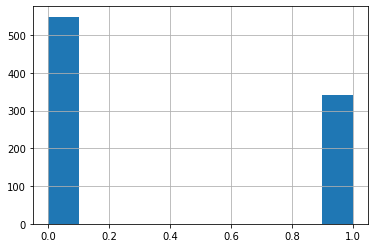

In [6]:
#regarder la distribution de la target, ici survived, on voit que le problème est assez équilibré 
# (presque autant de zero que de 1)
titanic.Survived.hist()

# visualisation

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

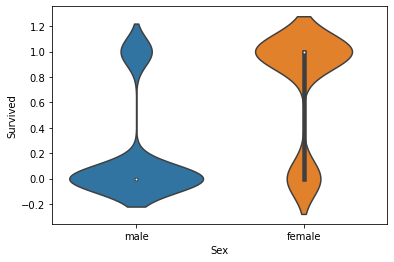

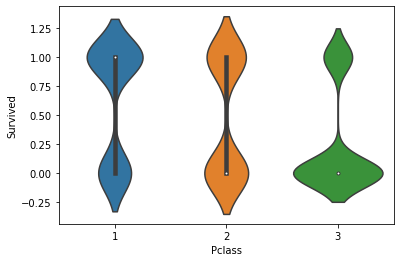

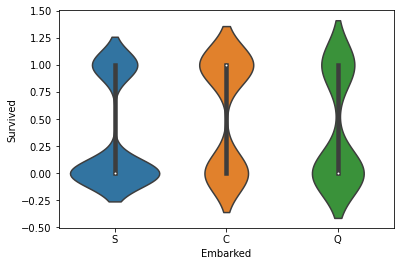

In [8]:
#sns.violinplot(x='Survived',y='Pclass',data=titanic) #plus précis que boxplot et plus stylé
cat_features = ['Sex','Pclass','Embarked']
for var in cat_features:
    sns.violinplot(x=var,y='Survived', data=titanic)
    plt.show()

In [9]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

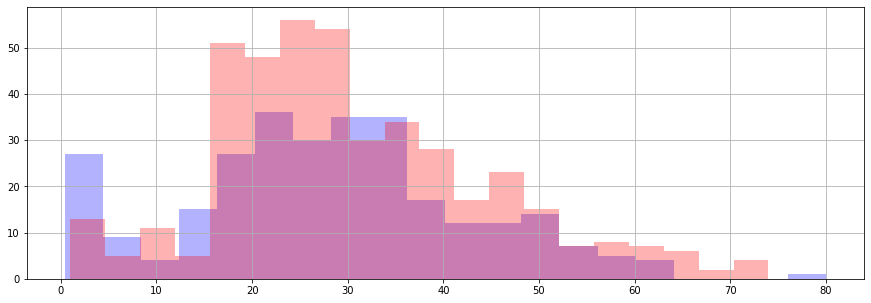

In [10]:
has_survived = titanic.Survived == 1
titanic.loc[has_survived, 'Age'].hist(bins=20, alpha=.3, color='blue', figsize=[15,5])
titanic.loc[[not el for el in has_survived], 'Age'].hist(bins=20, alpha=.3, color='red', figsize=[15,5])

In [11]:
titanic[['Embarked','Pclass','Survived']].groupby(['Embarked','Pclass']).agg(['mean','count'])

Survived      
                     mean count
Embarked Pclass                
C        1       0.694118    85
         2       0.529412    17
         3       0.378788    66
Q        1       0.500000     2
         2       0.666667     3
         3       0.375000    72
S        1       0.582677   127
         2       0.463415   164
         3       0.189802   353

# Data cleaning

In [12]:
titanic.isna().sum() #check missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
titanic[titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [14]:
mode_embarked = titanic.Embarked.mode()[0] #valeur la plus représentée dans le dataset
titanic.Embarked = titanic.Embarked.fillna(mode_embarked) #on remplace les valeurs Nan par le mode !

titanic.Age = titanic.Age.fillna(titanic.Age.median())

In [15]:
'OTHER' in titanic.Cabin.unique() # on regarde si on a deja une classe 'OTHER' avant d'essayer de remplacer

False

In [16]:
titanic.Cabin = titanic.Cabin.fillna('OTHER')

# Feature Engineering

In [17]:
df_embarked = pd.get_dummies(titanic.Embarked, prefix='Embarked')#on transfrome en matrice


In [18]:
titanic = pd.concat([titanic, df_embarked], axis = 1)#axis pour colonnes, on rajoute 
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [19]:
from sklearn.preprocessing import LabelBinarizer #on transforme le male ou female en 0 e 1 avec autre méthode que 
# dummies
lb = LabelBinarizer()
titanic.Sex = lb.fit_transform(titanic.Sex)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,OTHER,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,OTHER,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,OTHER,S,0,0,1


## Normalisation 

In [20]:
# MinMax scaling to normalize between 0 and 1 : (X-min)/(max-min) 
# on l'utilise quand les données sont vraiment sur des échelles diférentes (genre prix en million et 
# nb de pièce - de 10)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm = MinMaxScaler()
ss = StandardScaler()

In [21]:
# On choisit les attributs qu'on veut garder
feat_to_keep = ['Survived','Pclass','Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S']

In [22]:
mm.fit(titanic[feat_to_keep])

MinMaxScaler()

In [23]:
titanic[feat_to_keep] = mm.transform(titanic[feat_to_keep])
titanic[feat_to_keep].head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,1.0,0.271174,0.014151,0.0,0.0,1.0
1,1.0,0.0,0.0,0.472229,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.015469,0.0,0.0,1.0
3,1.0,0.0,0.0,0.434531,0.103644,0.0,0.0,1.0
4,0.0,1.0,1.0,0.434531,0.015713,0.0,0.0,1.0


In [24]:
# interesting method : apply
titanic['new_feat']=titanic.Age.apply(lambda x: x*10)

# Modeling

In [25]:
from sklearn.model_selection import train_test_split #recall pour tumeurs !
from sklearn.metrics import accuracy_score

In [26]:
y = titanic.Survived
X = titanic[['Sex','Pclass','Age','Fare','Embarked_C','Embarked_Q','Embarked_S']]

In [27]:
from sklearn.linear_model import LogisticRegression
pred=[]
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=i)
    lr = LogisticRegression()
    lr.fit(X,y)
    pred.append(accuracy_score(y_test,lr.predict(X_test)))

C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

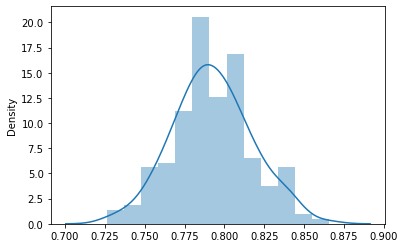

In [28]:
#predictions = lr.predict_proba(X_test)[:,1]
#accuracy_score(y_test, lr.predict(X_test))
sns.distplot(pred)

<AxesSubplot:>

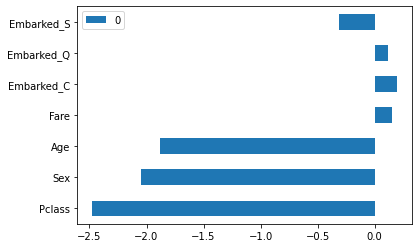

In [29]:
chosen_features = ['Pclass','Sex','Age','Fare','Embarked_C','Embarked_Q','Embarked_S']
pd.DataFrame(lr.coef_, columns=chosen_features).T.plot(kind="barh")

# Decision tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#import pydot
train_test_score = []
from IPython.display import Image
for i in range(1,100):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    train_test_score.append((dtc.score(X_test,y_test), dtc.score(X_train,y_train)))

[Text(558.0, 475.65000000000003, 'Pclass <= 0.5\ngini = 0.472\nsamples = 668\nvalue = [413, 255]'),
 Text(279.0, 339.75, 'Sex <= 0.75\ngini = 0.378\nsamples = 237\nvalue = [60, 177]'),
 Text(139.5, 203.85000000000002, 'Fare <= 0.056\ngini = 0.1\nsamples = 133\nvalue = [7, 126]'),
 Text(69.75, 67.94999999999999, '\n  (...)  \n'),
 Text(209.25, 67.94999999999999, '\n  (...)  \n'),
 Text(418.5, 203.85000000000002, 'Fare <= 0.041\ngini = 0.5\nsamples = 104\nvalue = [53, 51]'),
 Text(348.75, 67.94999999999999, '\n  (...)  \n'),
 Text(488.25, 67.94999999999999, '\n  (...)  \n'),
 Text(837.0, 339.75, 'Age <= 0.076\ngini = 0.296\nsamples = 431\nvalue = [353, 78]'),
 Text(697.5, 203.85000000000002, 'Sex <= 0.75\ngini = 0.36\nsamples = 17\nvalue = [4, 13]'),
 Text(627.75, 67.94999999999999, '\n  (...)  \n'),
 Text(767.25, 67.94999999999999, '\n  (...)  \n'),
 Text(976.5, 203.85000000000002, 'Fare <= 0.051\ngini = 0.265\nsamples = 414\nvalue = [349, 65]'),
 Text(906.75, 67.94999999999999, '\n  (.

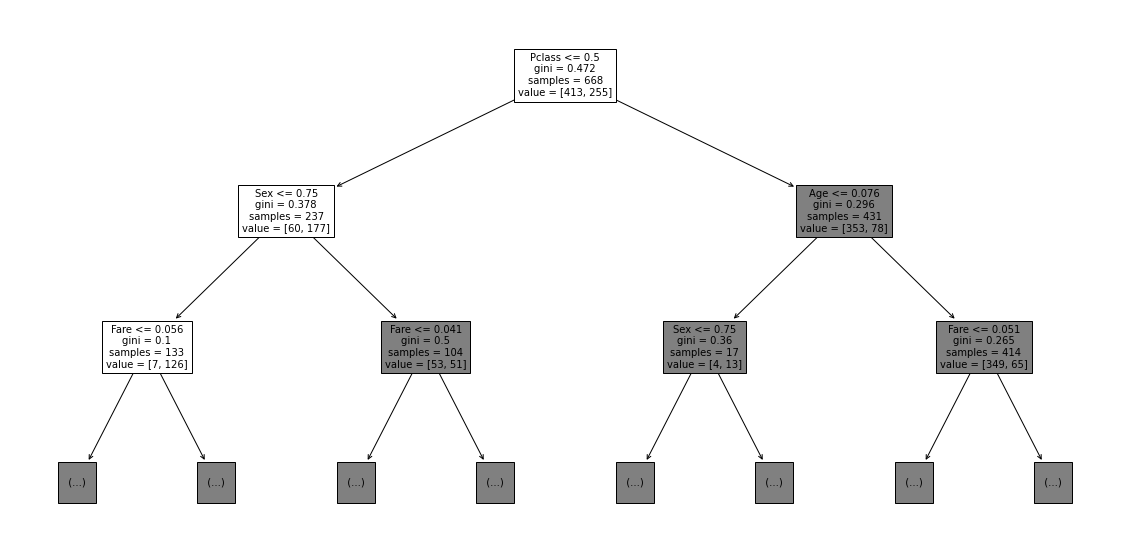

In [31]:
plt.figure(figsize=(20,10))
plot_tree(dtc, fontsize=10, feature_names=chosen_features, max_depth=2)

# And several other models

## Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
# hyperparameters fine tuning 
clf = RandomForestClassifier(n_jobs=-1)
param_grid = {'n_estimators':[5,10,15,20],
             'max_depth': [2,5,7,9]}
grid_clf = GridSearchCV(clf, param_grid, cv=5)
grid_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [5, 10, 15, 20]})

In [34]:
grid_clf.best_score_

0.8233643811020087

In [35]:
grid_clf.best_params_

{'max_depth': 5, 'n_estimators': 15}